 *Agent for Support - > State Graph Implementation* 

Requirements

In [3]:
from state import SupportState
from nodes import greet_the_user, identify_issue, provide_solution, __inspector__, should_condition_after_inspection,end_function
import os
from dotenv import load_dotenv
from langgraph.graph import END, START, StateGraph
from langchain_openai import ChatOpenAI

load_dotenv()
llm = ChatOpenAI(model_name='gpt-4o-mini', temperature=0.9, api_key=os.getenv('OPENAI_API_KEY'))




Graph Definition

In [4]:
graph = StateGraph(SupportState)

graph = StateGraph(SupportState)
graph.add_node("greet_the_user", greet_the_user)
graph.add_node("identify_issue", identify_issue)
graph.add_node("provide_solution", provide_solution)
graph.add_node("__inspector__", __inspector__)
graph.add_node("end_state",end_function)

graph.add_edge("greet_the_user", "identify_issue")
graph.add_edge("identify_issue", "provide_solution")
graph.add_edge("provide_solution", "__inspector__")
graph.add_edge("end_state",END)

graph.add_conditional_edges("__inspector__", should_condition_after_inspection,{'provide_solution' :'provide_solution',
                                                                                 "end_state" : "end_state" })

graph.set_entry_point("greet_the_user")

runnable = graph.compile()

Test Case

In [5]:
def main():
    
    initial_state = {
        "name": "Dev",
        "issue": "forgot mobile password",  
        "solution_approved": False,
        "inspection_count": 0  
    }

    try:
        final_state = runnable.invoke(input=initial_state)
        print('#############FINAL SOLUTION#####################')
        print(final_state['solution'])
        print('#############FINAL SOLUTION#####################')
        print('\n'*7)
        return final_state

    except Exception as e:
        print('e')
        return e


print(main())




c:\Users\Dev\Desktop\Langgraph\Support_Agent\utils\nodes.py:13: LangChainDeprecationWarning: The method `BaseChatModel.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = llm.predict(prompt)


Hello Dev! How can I assist you today?








Hello Dev, I am here to help you. Are you facing any issues that I can assist you with? Please feel free to let me know how I can help you.








• Forgetting a mobile password can be a frustrating experience for users.
• It can lead to being locked out of the device and losing access to important information.
• Some devices may have options for resetting the password, such as using a backup email or answering security questions.
• If these options are not available, the user may need to seek help from the device manufacturer or a professional technician to regain access to the device.
• It is important to try and remember or securely store passwords to avoid this situation in the future.



LLM Feedback : The solution provided accurately addresses the issue of forgetting a mobile password and the potential consequences that come with it. However, it could be more concise by condensing some of the points. 

For example:

- Forgetting a m

Graph Representation

In [7]:
print(runnable.get_graph().draw_mermaid())

%%{init: {'flowchart': {'curve': 'linear'}}}%%
graph TD;
	__start__([<p>__start__</p>]):::first
	greet_the_user(greet_the_user)
	identify_issue(identify_issue)
	provide_solution(provide_solution)
	__inspector__(<p>__inspector__</p>)
	end_state(end_state)
	__end__([<p>__end__</p>]):::last
	__start__ --> greet_the_user;
	end_state --> __end__;
	greet_the_user --> identify_issue;
	identify_issue --> provide_solution;
	provide_solution --> __inspector__;
	__inspector__ -.-> provide_solution;
	__inspector__ -.-> end_state;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



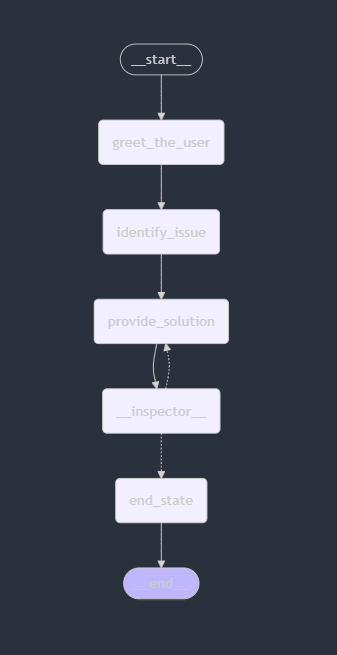
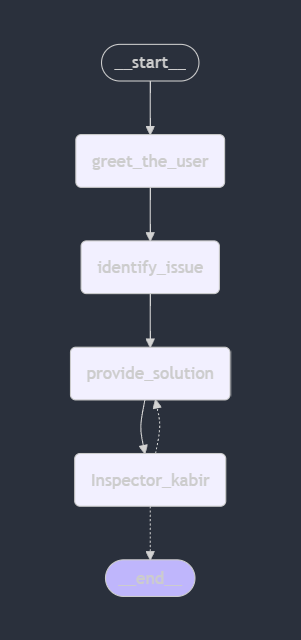

In [ ]:
from state import SupportState
from nodes import greet_the_user, identify_issue, provide_solution, __inspector__, should_condition_after_inspection,end_function
import os
from dotenv import load_dotenv
from langgraph.graph import END, START, StateGraph
from langchain_openai import ChatOpenAI

load_dotenv()
llm = ChatOpenAI(model_name='gpt-4o-mini', temperature=0.9, api_key=os.getenv('OPENAI_API_KEY'))


graph = StateGraph(SupportState)

graph = StateGraph(SupportState)
graph.add_node("greet_the_user", greet_the_user)
graph.add_node("identify_issue", identify_issue)
graph.add_node("provide_solution", provide_solution)
graph.add_node("__inspector__", __inspector__)
graph.add_node("end_state",end_function)

graph.add_edge("greet_the_user", "identify_issue")
graph.add_edge("identify_issue", "provide_solution")
graph.add_edge("provide_solution", "__inspector__")
graph.add_edge("end_state",END)




graph.add_conditional_edges("__inspector__", should_condition_after_inspection,{'provide_solution' :'provide_solution',
                                                                                 "end_state" : "end_state" })

graph.set_entry_point("greet_the_user")

runnable = graph.compile()



def main():
    initial_state = {
        "name": "John",
        "issue": "forgot mobile password",  
        "solution_approved": False,
        "inspection_count": 0  
    }

    try:
        final_state = runnable.invoke(input=initial_state)
        print('#############FINAL SOLUTION#####################')
        print(final_state['solution'])
        print('#############FINAL SOLUTION#####################')
        print('\n'*7)
        return final_state

    except Exception as e:
        print('e')
        return e


print(main())


